## Just mucking around with veneer

First of all set up veneer

In [1]:
from veneer.manage import start, create_command_line, kill_all_now
import veneer

In [3]:
veneer_install = 'D:/PythonScriptingForGBR/VeneerPlugin/v411'
#source_version = '4.1.1'
#By specifying source_path I can use my local Source compilation/code, using source_version above uses tyhe sinatlled version
source_pathstr = 'D:/SourceSource/Output'
cmd_directory = 'C:/tempveneer/veneer_cmd'
#dest = 'C:\\tempveneer\\veneer_cmd'
#path = create_command_line(veneer_install,source_version,dest=cmd_directory)
path = create_command_line(veneer_install,source_version=None,source_path=source_pathstr,dest=cmd_directory)
path

WindowsPath('C:/tempveneer/veneer_cmd/FlowMatters.Source.VeneerCmd.exe')

I'm just going to start one copy of the hydro model by defining the veneer location, the model and the server port

In [4]:
#path = 'C:\\Users\\bennettf\\Desktop\\vcmd\\FlowMatters.Source.VeneerCmd.exe'
    
catchment_project='D:\\Beckers\\Beckers_GBR_411_Seasonal.rsproj'
#catchment_project='C:/Users/bennettf/OneDrive/python_stuff/Jupyter_Notebooks/veneer/doc/training/ExampleProject/CalibrationExample.rsproj'
num_copies=1    # Important - set this to be a number ~ the number of CPU cores in your system!
first_port=9950

In [5]:
#Now, ope the project
processes,ports = start(catchment_project,
                        n_instances=num_copies,
                        ports=first_port,
                        debug=True,
                        veneer_exe=path,
                        remote=False )

Starting C:\tempveneer\veneer_cmd\FlowMatters.Source.VeneerCmd.exe -p 9950 -s  D:\Beckers\Beckers_GBR_411_Seasonal.rsproj
[0] Loading plugins

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\DERMTools.dll

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\Dynamic_SedNet.dll

[0] Loaded C:\Program Files\eWater\Source 4.1.1.4513\Plugins\GBR_DynSed_Extension.dll

[0] Loaded D:\PythonScriptingForGBR\VeneerPlugin\v411\FlowMatters.Source.Veneer.dll

[0] Plugins loaded (4/4)

[0] Opening project file: D:\Beckers\Beckers_GBR_411_Seasonal.rsproj

ERROR[0] log4net:ERROR Failed to find configuration section 'log4net' in the application's .config file. Check your .config file for the <log4net> and <configSections> elements. The configuration section should look like: <section name="log4net" type="log4net.Config.Log4NetConfigurationSectionHandler,log4net" />

[0] Loading project

[0] Project Loaded

[0] New Project

[0] Scenario 1

[0] [2:38:08 PM] Veneer, by Flow Matters: h

Assign the veneer client

In [6]:
vs = [veneer.Veneer(port=p) for p in ports]
v = vs[0]

Have a look to see what models are associated with the model

In [7]:
#v.model.find_model_type('')

There are many, but we are interested in the Sacramento model **TIME.Models.RainfallRunoff.Sacramento.Sacramento**. Let's find out what parameters belog to this model 


In [8]:
#params = v.model.find_parameters('TIME.Models.RainfallRunoff.Sacramento.Sacramento')
#params

Cool, let's now have a look at the catchments defined in the network

In [9]:
v.model.catchment.names()

['SC #3', 'SC #2', 'SC #5', 'SC #4', 'SC #1']

Now list the FUs

In [10]:
#v.model.catchment.get_functional_unit_types()

I want to find the value for a Sac parameter for a particular FU/catchment combination

In [11]:
#v.model.catchment.runoff.get_param_values('Adimp',fus=['Grazing'], catchments = ['SC #3'])

Let's set a new value for that parameter

In [12]:
#v.model.catchment.runoff.set_param_values('Adimp', 0.05 ,fus=['Water'], catchments = 'SC #158')

Thats done, now we will run the model but we will set up some recorders before that.

In [13]:
#v.configure_recording(disable=[{}],enable=[{'RecordingVariable':'Downstream Flow Volume'}])
v.configure_recording(disable=[{}],enable=[{'RecordingVariable':'Downstream Flow Volume'}])
v.configure_recording(enable=[{'RecordingElement':'Constituents','RecordingVariable':'Constituents@Sediment - Fine@Downstream Flow Mass'}])

#v.configure_recording(disable=[{}],enable=[{'RecordingVariable':'Downstream Flow Volume'},{'RecordingElement':'Constituents','RecordingVariable':'Constituents@Sediment - Fine@Downstream Flow Mass'}])

In [14]:
#v.configure_recording(disable=[{}],enable=[{'RecordingElement':'Constituents','RecordingVariable':'Constituents@Sediment - Fine@Downstream Flow Mass'}])

In [15]:
# Bombs away
v.run_model(params={'NoHardCopyResults':False})

(302, 'runs/1')

Job done, now get some data from the model

In [17]:
#downstream = v.retrieve_multiple_time_series(criteria={'RecordingVariable':'Downstream Flow Volume','NetworkElement':'link for catchment SC #1'})
downstream = v.retrieve_multiple_time_series(criteria={'RecordingElement':'Constituents','RecordingVariable':'Constituents@Sediment - Fine@Downstream Flow Mass','NetworkElement':'link for catchment SC #1'})

print(downstream)

            link for catchment SC #1:Fine@Downstream Flow Mass
2000-01-01                                       0.000000e+00 
2000-01-02                                       0.000000e+00 
2000-01-03                                       0.000000e+00 
2000-01-04                                       9.409359e+06 
2000-01-05                                       4.478244e+05 
2000-01-06                                       8.466559e+05 
2000-01-07                                       1.522590e+05 
2000-01-08                                       0.000000e+00 
2000-01-09                                       7.856505e+05 
2000-01-10                                       1.635870e+06 
2000-01-11                                       1.324785e+08 
2000-01-12                                       1.287140e+07 
2000-01-13                                       0.000000e+00 
2000-01-14                                       0.000000e+00 
2000-01-15                                       0.0000

And lets have a look at it

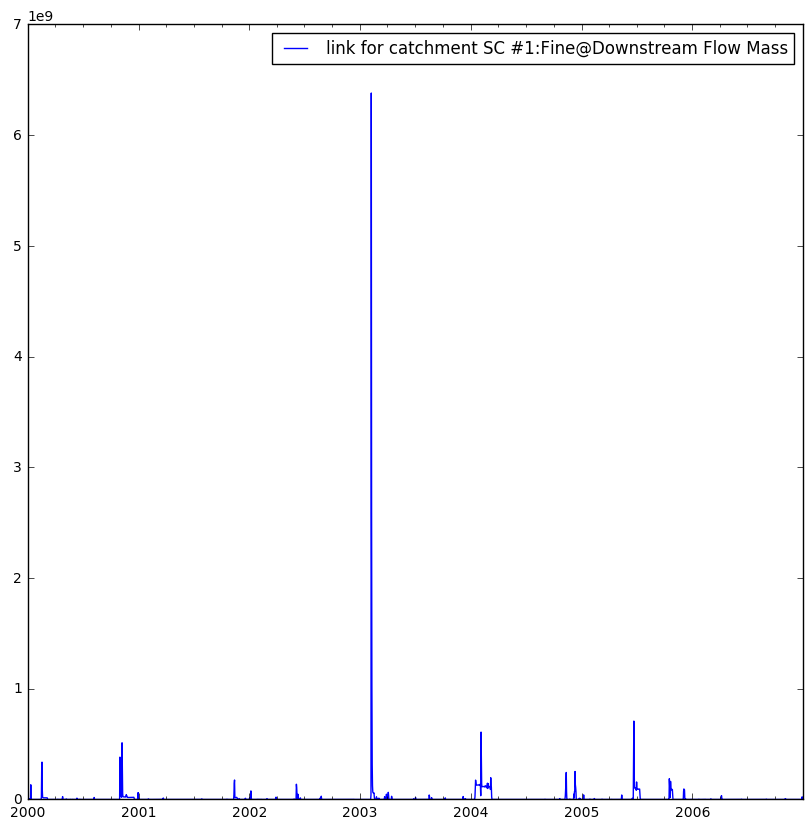

In [18]:
%matplotlib inline
#downstream[['link for catchment SC #1:Downstream Flow Volume']].plot(figsize=(10,10))
downstream[['link for catchment SC #1:Fine@Downstream Flow Mass']].plot(figsize=(10,10))